In [1]:
import pandas  as pd
import  matplotlib.pyplot  as plt
from  sklearn.model_selection  import  train_test_split
import  seaborn  as  sb
import  numpy  as  np
from  sklearn.metrics  import  accuracy_score



In [2]:
# now loading  data
df=pd.read_csv('prices-split-adjusted.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [35]:
df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [36]:
#sb.countplot(df['volume'])  

In [37]:
y=df.iloc[:,2:3].values
y.reshape(-1,1)
y


array([[123.43    ],
       [125.239998],
       [116.379997],
       ...,
       [ 53.639999],
       [ 44.73    ],
       [ 54.200001]])

In [38]:
#  data  with  X  axis experience
x=df.iloc[:,6:7].values
x.reshape(-1,1)
x

array([[2163600.],
       [2386400.],
       [2489500.],
       ...,
       [1701200.],
       [1380900.],
       [ 705100.]])

In [41]:
#  training  and testing  set  
train_x,test_x,train_y,test_y=train_tetrain_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)



In [42]:
#  calling  linear  regression
from  sklearn.linear_model  import  LinearRegression
regr=LinearRegression()


In [43]:
 #now applying  training  data and  answer
trained=regr.fit(train_x,train_y)

In [44]:
output=trained.predict(test_x)

/usr/lib/python3/dist-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


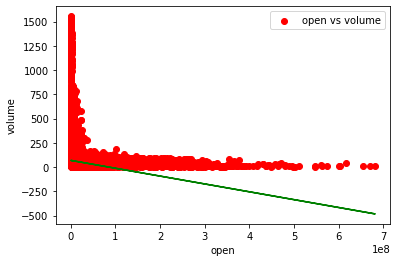

In [45]:
plt.scatter(train_x,train_y,label='open vs volume',color='red')
plt.plot(train_x,trained.predict(train_x),color='green')
#plt.plot(test_x,output,color='blue')
plt.xlabel('open')
plt.ylabel('volume')
plt.legend()

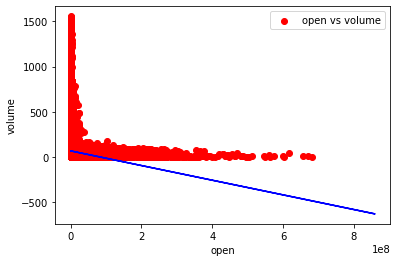

In [47]:
#making  model of  untrained data
plt.scatter(train_x,train_y,label='open vs volume',color='red')

plt.plot(test_x,output,color='blue')
plt.xlabel('open')
plt.ylabel('volume')
plt.legend()


In [3]:
y=df.iloc[:,3:4].values
y.reshape(-1,1)
y


array([[125.839996],
       [119.980003],
       [114.949997],
       ...,
       [ 53.529999],
       [ 45.450001],
       [ 53.630001]])

In [4]:
x=df.iloc[:,6:7].values
x.reshape(-1,1)
x

array([[2163600.],
       [2386400.],
       [2489500.],
       ...,
       [1701200.],
       [1380900.],
       [ 705100.]])

In [5]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)


In [6]:
from  sklearn.linear_model  import  LinearRegression
regr=LinearRegression()


In [7]:
trained=regr.fit(train_x,train_y)

In [8]:
output=trained.predict(test_x)

/usr/lib/python3/dist-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


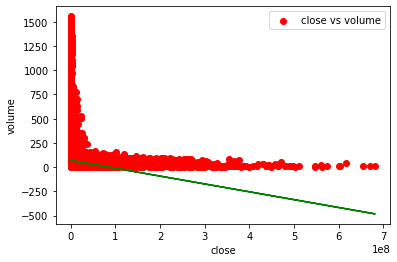

In [9]:
plt.scatter(train_x,train_y,label='close vs volume',color='red')
plt.plot(train_x,trained.predict(train_x),color='green')

plt.xlabel('close')
plt.ylabel('volume')
plt.legend()

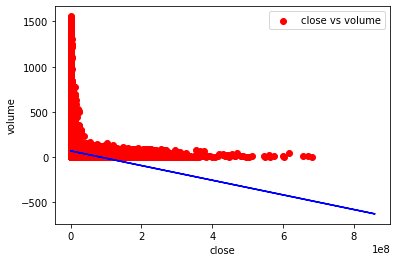

In [10]:
plt.scatter(train_x,train_y,label='close vs volume',color='red')

plt.plot(test_x,output,color='blue')
plt.xlabel('close')
plt.ylabel('volume')
plt.legend()


In [11]:
x=df.iloc[:,6:7].values
x

array([[2163600.],
       [2386400.],
       [2489500.],
       ...,
       [1701200.],
       [1380900.],
       [ 705100.]])

In [12]:
y=df.iloc[:,3:4].values
y.reshape(-1,1)
y


array([[125.839996],
       [119.980003],
       [114.949997],
       ...,
       [ 53.529999],
       [ 45.450001],
       [ 53.630001]])

In [13]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from  sklearn.linear_model  import  LinearRegression
regr=LinearRegression()


In [15]:
trained=regr.fit(train_x,train_y)

In [16]:
output=trained.predict(test_x)

/usr/lib/python3/dist-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


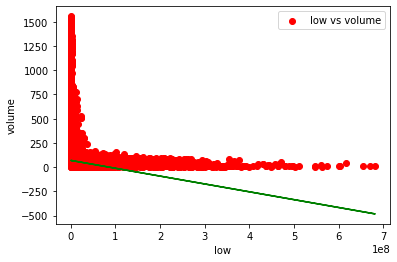

In [17]:
plt.scatter(train_x,train_y,label='low vs volume',color='red')
plt.plot(train_x,trained.predict(train_x),color='green')
#plt.plot(test_x,output,color='blue')
plt.xlabel('low')
plt.ylabel('volume')
plt.legend()

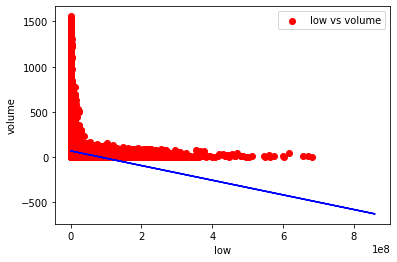

In [18]:
plt.scatter(train_x,train_y,label='low vs volume',color='red')

plt.plot(test_x,output,color='blue')
plt.xlabel('low')
plt.ylabel('volume')
plt.legend()
